In [27]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy as st
import numpy as np
from scipy.stats import linregress

In [2]:
#import vechicle data
vehicle_data = pd.read_csv("vehicle_data.csv.gz",
               compression="gzip")

vehicle_data.head()



,vin,registration_class,zip,model_year,body_type,fuel_type
0,999407G3573,PAS,12866,1976,SUBN,GAS
1,9992313,PAS,13316,1924,CONV,GAS
2,998867,PAS,11501,1952,2DSD,GAS
3,9983692,PAS,10940,1936,2DSD,GAS
4,99782010525,PAS,11225,1978,2DSD,GAS


In [3]:
#import aqi from 2009 and 2020

aqi_df = pd.read_csv("AQIndex.csv", index_col=0)

aqi_df.head()



,zip,AQI,Category Number,Category Name,Pollutant,Year
0,12032,90,2,Moderate,OZONE,2009
1,12108,90,2,Moderate,OZONE,2009
2,12134,90,2,Moderate,OZONE,2009
3,12139,90,2,Moderate,OZONE,2009
4,12164,90,2,Moderate,OZONE,2009


In [4]:
#make merged vehicle and aqi data frames for each year
#2009

vehicle_09 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2009]

aqi_group = aqi_df.groupby('Year')

aqi_2009 = aqi_group.get_group(2009)

aqi_2009

vehicle_aqi_09 = pd.merge(aqi_2009, vehicle_09, on=['zip','zip'], how="left" )
vehicle_aqi_09

#2020

vehicle_20 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2020]

aqi_group = aqi_df.groupby('Year')

aqi_2020 = aqi_group.get_group(2020)

aqi_2020

vehicle_aqi_20 = pd.merge(aqi_2020, vehicle_20, on=['zip','zip'], how="left" )
vehicle_aqi_20

#2015

vehicle_15 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2015]

aqi_group = aqi_df.groupby('Year')

aqi_2015 = aqi_group.get_group(2015)

aqi_2015

vehicle_aqi_15 = pd.merge(aqi_2015, vehicle_15, on=['zip','zip'], how="left" )
vehicle_aqi_15



,zip,AQI,Category Number,Category Name,Pollutant,Year,vin,registration_class,model_year,body_type,fuel_type
0,12032,44,1,Good,OZONE,2015,8T03C193065,PAS,1968,CONV,GAS
1,12032,44,1,Good,OZONE,2015,8T01C214689,PAS,1968,2DSD,GAS
2,12032,44,1,Good,OZONE,2015,7T03S242307,PAS,1967,CONV,GAS
3,12032,44,1,Good,OZONE,2015,6MPCT01Z8P8644612,PAS,1993,CONV,GAS
4,12032,44,1,Good,OZONE,2015,57548132568,PAS,1962,UTIL,GAS
...,...,...,...,...,...,...,...,...,...,...,...
2562314,12514,39,1,Good,OZONE,2015,BS23H0B321981,PAS,1970,2DSD,GAS
2562315,12514,39,1,Good,OZONE,2015,BN2L228178,PAS,1956,2DSD,GAS
2562316,12514,39,1,Good,OZONE,2015,A135828,SRF,1964,2DSD,GAS
2562317,12514,39,1,Good,OZONE,2015,AR1154100006721,PAS,1979,CONV,GAS


In [53]:
#import NYS zipcode csv

#zcode_df = pd.read_csv("newyork_cities.csv")

#zcode_df



,Unnamed: 0,City,State,Zipcode,Latitude,Longitude
0,25,Adirondacks Region,NY,12032,43.2295,-74.5171
1,26,Adirondacks Region,NY,12108,43.4531,-74.4567
2,27,Adirondacks Region,NY,12134,43.2027,-74.1115
3,28,Adirondacks Region,NY,12139,43.4032,-74.5363
4,29,Adirondacks Region,NY,12164,43.4904,-74.3743
...,...,...,...,...,...,...
1559,15881,Western New York Region,NY,14784,42.3222,-79.3592
1560,15882,Western New York Region,NY,14787,42.3216,-79.5741
1561,15883,Western New York Region,NY,14416,43.1329,-78.0068
1562,15884,Western New York Region,NY,14422,43.0814,-78.0645


In [5]:




#grouped_city = zcode_df.groupby('City').agg('Zipcode')

#print(grouped_city)

#grouped_city_df = pd.DataFrame(grouped_city)

#grouped_city_df

 

#data = [zcode_df["City"], zcode_df["Zipcode"]]

#headers = ["Region", "Zipcode"]

#region_zip = pd.concat(data, axis=1, keys=headers)


#region_zip

#region_dic = region_zip.groupby('Region')['Zipcode'].apply(list).to_dict()

#region_dic

NameError: name 'zcode_df' is not defined

In [6]:
#region_group = region_zip.groupby('Region')

#region_group.describe()

#region_group.groups.keys()

NameError: name 'region_zip' is not defined

In [8]:
#count how many cars are in zipcode

#2009 zipcode count

cars_per_zip9 = vehicle_aqi_09.groupby('zip').agg({"vin": "count", "AQI": "mean"})

cars_per_zip9 = cars_per_zip9.reset_index()

cars_per_zip9.columns = ['Zipcode', 'Number of Cars', "AQI Mean"]



#2020 zipcode count

cars_per_zip20 = vehicle_aqi_20.groupby('zip').agg({"vin": "count", "AQI": "mean"})

cars_per_zip20 = cars_per_zip20.reset_index()

cars_per_zip20.columns = ['Zipcode', 'Number of Cars', "AQI Mean"]



#2015 zipcode count

cars_per_zip15 = vehicle_aqi_15.groupby('zip').agg({"vin": "count", "AQI": "mean"})


cars_per_zip15 = cars_per_zip15.reset_index()

cars_per_zip15.columns = ['Zipcode', 'Number of Cars', "AQI Mean"]






cars_per_zip9
cars_per_zip15
cars_per_zip20






,Zipcode,Number of Cars,AQI Mean
0,10001,4402,64
1,10002,11137,64
2,10003,5451,64
3,10004,1078,64
4,10005,1029,64
...,...,...,...
1159,14898,797,45
1160,14901,6573,45
1161,14903,5202,45
1162,14904,8161,45


r-value = -0.30908174171411174
r-squared value = 0.09553152306102888


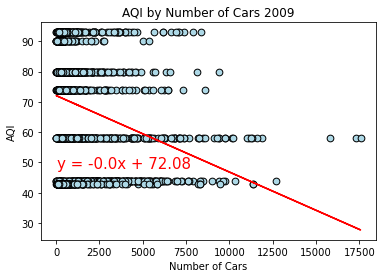

In [38]:
#scatter plot for each year
#2009
#cars_per_zip9.plot.scatter
#plt.show
#(x='', y='width',c='DarkBlue'))
#plt.figure(figsize=(8,6))
plt.scatter(cars_per_zip9["Number of Cars"], cars_per_zip9['AQI Mean'], c='LightBlue', edgecolor='Black', s=45)
plt.xlabel("Number of Cars")
plt.ylabel("AQI")
plt.title("AQI by Number of Cars 2009")

#plot line regress

(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_per_zip9['Number of Cars'], cars_per_zip9['AQI Mean'])
regress_values = cars_per_zip9['Number of Cars'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cars_per_zip9['Number of Cars'], regress_values, "r-")
plt.annotate(line_eq,(20,48),fontsize=15,color="red")
print(f"r-value = {rvalue}")
print(f"r-squared value = {rvalue**2}")

plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

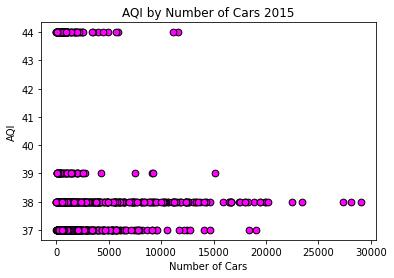

In [31]:


plt.scatter(cars_per_zip15["Number of Cars"], cars_per_zip15['AQI Mean'], c='Magenta', edgecolor='Black', s=45)
plt.xlabel("Number of Cars")
plt.ylabel("AQI")
plt.title("AQI by Number of Cars 2015")
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

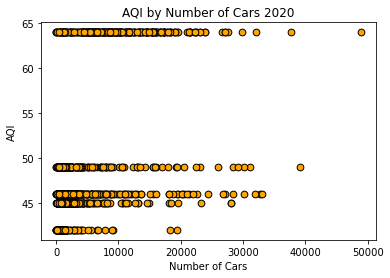

In [33]:
plt.scatter(cars_per_zip20["Number of Cars"], cars_per_zip20['AQI Mean'], c='Orange', edgecolor='Black', s=45)
plt.xlabel("Number of Cars")
plt.ylabel("AQI")
plt.title("AQI by Number of Cars 2020")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

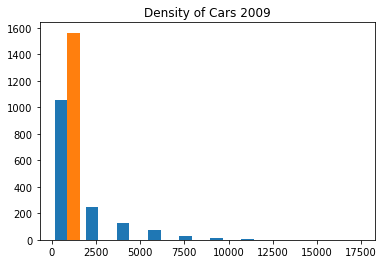

In [25]:
#histogram
#2009
x = (cars_per_zip9['Number of Cars'], cars_per_zip9['AQI Mean'])
plt.hist(x)
plt.title("Density of Cars 2009")
plt.show

#counts, bins = np.histogram(cars_per_zip9)
#plt.hist(bins[:-1], bins, weights=counts)
#plt.title("Density of Cars 2009")
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

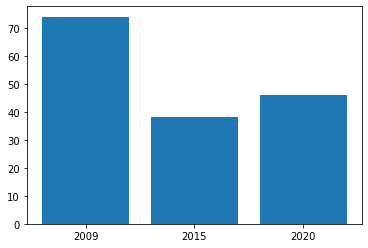

In [41]:
x= ("2009", "2015", "2020")
y= (cars_per_zip9['AQI Mean'].median(), cars_per_zip15['AQI Mean'].median(), cars_per_zip20['AQI Mean'].median())

plt.bar(x,y)
#fig, ax1 = plt.subplots()

plt.show

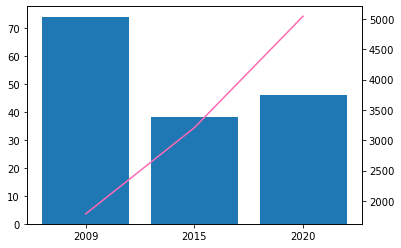

In [47]:
fig, ax1 = plt.subplots()
y2= (cars_per_zip9['Number of Cars'].mean(), cars_per_zip15['Number of Cars'].mean(), cars_per_zip20['Number of Cars'].mean())
ax1.bar(x,y)
ax2 = ax1.twinx()
ax2.plot(x, y2, c="HotPink")